In [ ]:
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 390, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 390 (delta 89), reused 51 (delta 51), pack-reused 269
Receiving objects: 100% (390/390), 107.11 KiB | 15.30 MiB/s, done.
Resolving deltas: 100% (191/191), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 333.0 kB/s eta 0:00:00
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla T4!
We will now install RAPIDS via pip!  Please stand by, should be quick...
***********************************************************************



In [ ]:
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)

Updating your Colab environment.  This will restart your kernel.  Don't Panic!
Found existing installation: cupy-cuda11x 11.0.0
Uninstalling cupy-cuda11x-11.0.0:
  Successfully uninstalled cupy-cuda11x-11.0.0
Traceback (most recent call last):
  File "/usr/bin/add-apt-repository", line 363, in <module>
    addaptrepo = AddAptRepository()
  File "/usr/bin/add-apt-repository", line 41, in __init__
    self.distro.get_sources(self.sourceslist)
  File "/usr/local/lib/python3.10/dist-packages/aptsources/distro.py", line 91, in get_sources
    raise NoDistroTemplateException(
aptsources.distro.NoDistroTemplateException: Error: could not find a distribution template for Ubuntu/jammy
Added repo
Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [108 kB]
Get:5 http:

In [ ]:
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:12
🔁 Restarting kernel...


In [ ]:
!python rapidsai-csp-utils/colab/install_rapids.py stable
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, r2_score
from tqdm import tqdm
import cuml.svm as cu_svm
# from cuml.model_selection import train_test_split
import cuml.model_selection as cuml_ms
from cuml.metrics import mean_squared_error, r2_score
import pandas as pd
import cudf

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/weatherAUS.csv")

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


<ipython-input-6-3f508e917d2d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


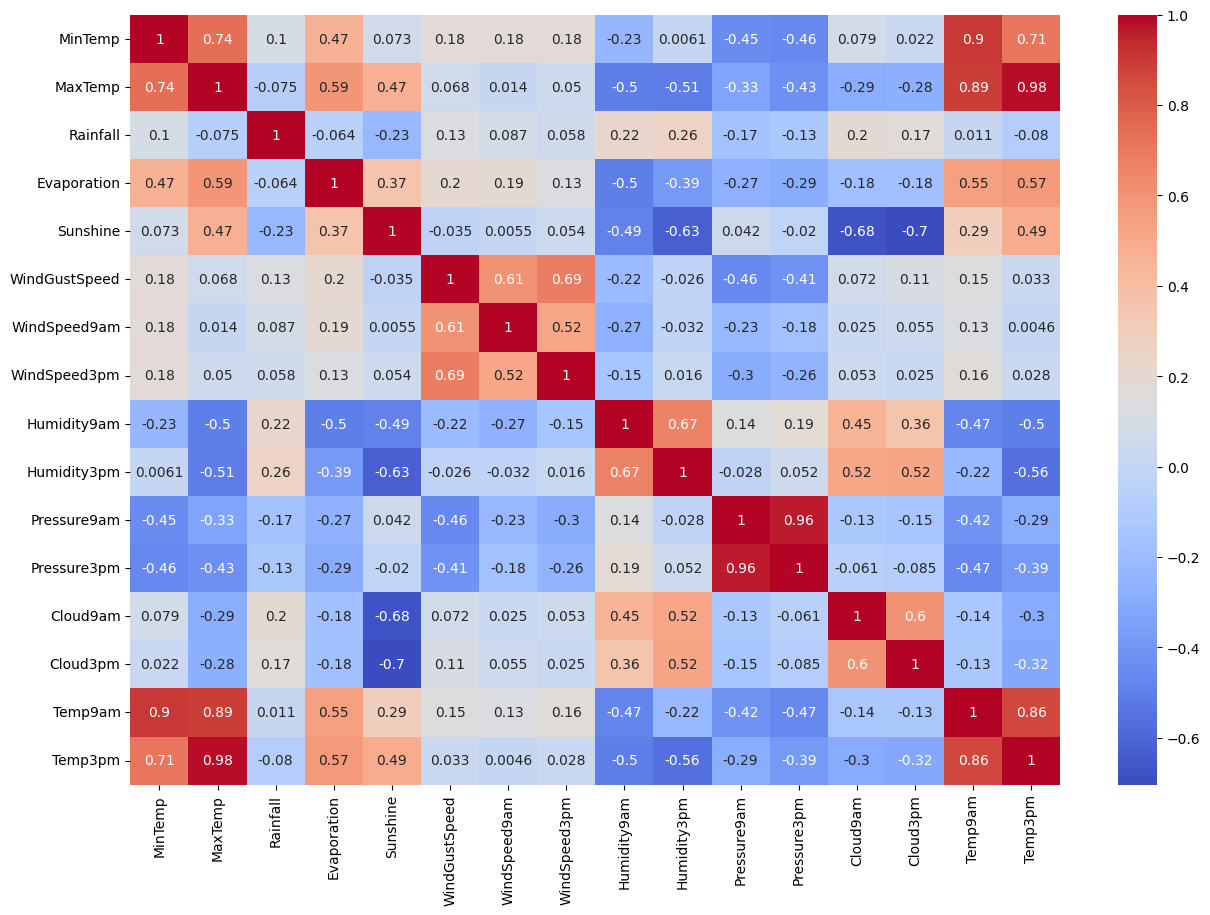

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
df.drop('Date', inplace=True, axis=1)
df.drop('Location', inplace=True, axis=1)
df.drop('WindGustDir', inplace=True, axis=1)
df.drop('WindDir9am', inplace=True, axis=1)
df.drop('WindDir3pm', inplace=True, axis=1)

In [ ]:
df = df.fillna(value=df['MinTemp'].mean())
df = df.fillna(value=df['MaxTemp'].mean())
df = df.fillna(value=df['Rainfall'].mean())
df = df.fillna(value=df['Evaporation'].mean())
df = df.fillna(value=df['Sunshine'].mean())
df = df.fillna(value=df['WindGustSpeed'].mean())
df = df.fillna(value=df['WindSpeed9am'].mean())
df = df.fillna(value=df['WindSpeed3pm'].mean())
df = df.fillna(value=df['Humidity9am'].mean())
df = df.fillna(value=df['Humidity3pm'].mean())
df = df.fillna(value=df['Pressure9am'].mean())
df = df.fillna(value=df['Pressure3pm'].mean())
df = df.fillna(value=df['Cloud9am'].mean())
df = df.fillna(value=df['Cloud3pm'].mean())
df = df.fillna(value=df['Temp9am'].mean())
df = df.fillna(value=df['Temp3pm'].mean())

In [ ]:
df.drop(df[df['RainToday'] == 12.19403438096892].index, inplace = True)
df.drop(df[df['RainTomorrow'] == 12.19403438096892].index, inplace = True)
df= df.replace(to_replace ="Yes",value =1)
df =df.replace(to_replace ="No",value =0)

In [ ]:
df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [ ]:
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

In [ ]:
for i in X.columns:
    X = X - X.mean(axis=0)
    X[i] = X[i]/np.max(np.abs(X[i]))

In [ ]:
X_cudf = cudf.DataFrame.from_pandas(X)
y_cudf = cudf.Series(y)

X_train_cudf, X_test_cudf, y_train_cudf, y_test_cudf = cuml_ms.train_test_split(X_cudf, y_cudf, test_size=0.2, random_state=42)

In [ ]:
svr_model = cu_svm.SVR()
param_grid = {
    'kernel': ['linear','rbf', 'poly','sigmoid'],
    'C': [0.1, 1],
    'gamma': ['auto', 1],
    'degree': [2, 3, 4]
}

In [ ]:
grid_search = cuml_ms.GridSearchCV(svr_model, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train_cudf, y_train_cudf)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_search.py:976: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


[W] [12:53:29.567148] SVR with the linear kernel can be much faster using the specialized solver provided by LinearSVR. Consider switching to LinearSVR if tranining takes too long.


In [ ]:
y_pred_cudf = best_model.predict(X_test_cudf)
y_pred_binary = np.where(y_pred_pandas >= 0.5, 1, 0)
y_test_pandas = y_test_cudf.to_pandas()
y_pred_pandas = y_pred_cudf.to_pandas()

In [ ]:
accuracy = accuracy_score(y_test_pandas, y_pred_binary)
print("Best Hyperparameters:", best_params)
print("Best Model Accuracy:", accuracy)

Best Hyperparameters: {'C': 0.1, 'degree': 2, 'gamma': 'auto', 'kernel': 'linear'}
Best Model Accuracy: 0.7980253578151082
